# Time Series Analysis and Forecasting of Tweeter Data

Continuous Assessment 2 17/11/2023 - BDSP & ADA // MSc in Data Analytics Y1 S2
Data: ProjectTweets.csv

# 1. Research Understanding Phase 

- In this study an overarching analysis of Sentiment variarion in Tweeter data over time was provided, preparing the data for modeling and analysis to predict sentiment in the future (7 days, 30 days, and 90 days).
- PySparkSQL was used in Jupyter Notebook file to complete this task, using SQL and Python coding language.
- To perform an organized and clear understanding of the study timeline, the notebook was based on Cross Industry Standard Process for Data Mining (CRISP-DM) Methodology was used, and the cells of code were grouped according to the methodology’s phases.
- An Autoregressor model was applied to the chosen variables X and y, as well as Time Series analysis using Seasonal Autoregressive Integrated Moving Average Exogenous (SARIMAX) model was performed for results comparison. For the evaluation phase Mean Squared Error (MSE) was used to measure the error between predicted and actual values.



# 2. Data Understanding Phase

Practical for Big Data Module. Explore tweeter data using PySpark.


In [1]:
#Import PySparkSQL
import pyspark
from pyspark.sql import SparkSession        

import warnings
warnings.filterwarnings("ignore") 


# Create SparkSession with enableHiveSupport
df = (SparkSession
  .builder
  .master("local[*]")
  .appName("SparkSQL")
  .enableHiveSupport() 
  .getOrCreate())

# Path to dataset
csv_file = "file:////home/hduser/Downloads/2023063_CA2/ProjectTweets.csv"

In [2]:
# Read and create a temporary view
df = (spark.read.format("csv")
  .option("inferSchema", "true")
  .option("header", "false")
  .load(csv_file)
  .toDF("id","number","date","query","name","body"))
df.createOrReplaceTempView("temp_view")

In [3]:
# Visualise inferred schema
data = spark.sql("SELECT * FROM temp_view")
data.printSchema()

root
 |-- id: integer (nullable = true)
 |-- number: long (nullable = true)
 |-- date: string (nullable = true)
 |-- query: string (nullable = true)
 |-- name: string (nullable = true)
 |-- body: string (nullable = true)



In [4]:
# Display 5 first rows
data.show(5)

+---+----------+--------------------+--------+---------------+--------------------+
| id|    number|                date|   query|           name|                body|
+---+----------+--------------------+--------+---------------+--------------------+
|  0|1467810369|Mon Apr 06 22:19:...|NO_QUERY|_TheSpecialOne_|@switchfoot http:...|
|  1|1467810672|Mon Apr 06 22:19:...|NO_QUERY|  scotthamilton|is upset that he ...|
|  2|1467810917|Mon Apr 06 22:19:...|NO_QUERY|       mattycus|@Kenichan I dived...|
|  3|1467811184|Mon Apr 06 22:19:...|NO_QUERY|        ElleCTF|my whole body fee...|
|  4|1467811193|Mon Apr 06 22:19:...|NO_QUERY|         Karoli|@nationwideclass ...|
+---+----------+--------------------+--------+---------------+--------------------+
only showing top 5 rows



In [150]:
# Create database
spark.sql("CREATE DATABASE IF NOT EXISTS projectdb")

2023-11-08 12:36:25,640 ERROR metastore.RetryingHMSHandler: AlreadyExistsException(message:Database projectdb already exists)
	at org.apache.hadoop.hive.metastore.HiveMetaStore$HMSHandler.create_database(HiveMetaStore.java:925)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at org.apache.hadoop.hive.metastore.RetryingHMSHandler.invokeInternal(RetryingHMSHandler.java:148)
	at org.apache.hadoop.hive.metastore.RetryingHMSHandler.invoke(RetryingHMSHandler.java:107)
	at com.sun.proxy.$Proxy23.create_database(Unknown Source)
	at org.apache.hadoop.hive.metastore.HiveMetaStoreClient.createDatabase(HiveMetaStoreClient.java:725)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccess

DataFrame[]

In [6]:
# Create table in database
spark.sql("CREATE TABLE IF NOT EXISTS projectdb.tweetsTable (id Int, number long, date String, query String, name String, body String)")

2023-11-06 13:55:51,594 WARN analysis.ResolveSessionCatalog: A Hive serde table will be created as there is no table provider specified. You can set spark.sql.legacy.createHiveTableByDefault to false so that native data source table will be created instead.
2023-11-06 13:55:51,800 WARN session.SessionState: METASTORE_FILTER_HOOK will be ignored, since hive.security.authorization.manager is set to instance of HiveAuthorizerFactory.
2023-11-06 13:55:51,887 WARN conf.HiveConf: HiveConf of name hive.internal.ss.authz.settings.applied.marker does not exist
2023-11-06 13:55:51,887 WARN conf.HiveConf: HiveConf of name hive.stats.jdbc.timeout does not exist
2023-11-06 13:55:51,887 WARN conf.HiveConf: HiveConf of name hive.stats.retries.wait does not exist
2023-11-06 13:55:51,902 ERROR metastore.RetryingHMSHandler: AlreadyExistsException(message:Table tweetstable already exists)
	at org.apache.hadoop.hive.metastore.HiveMetaStore$HMSHandler.create_table_core(HiveMetaStore.java:1416)
	at org.apac

DataFrame[]

In [7]:
# Alocate data to hive database
#spark.sql("INSERT INTO TABLE projectdb.tweetsTable SELECT * FROM temp_view")

In [8]:
# Display table content
spark.sql("SELECT * FROM projectdb.tweetsTable").show(10,truncate=False)

+------+----------+----------------------------+--------+---------------+-----------------------------------------------------------------------------------------------------------------------------------------+
|id    |number    |date                        |query   |name           |body                                                                                                                                     |
+------+----------+----------------------------+--------+---------------+-----------------------------------------------------------------------------------------------------------------------------------------+
|816210|1551363506|Sat Apr 18 08:51:40 PDT 2009|NO_QUERY|prosario_2000  |@ctribe I hope you are having a great day.                                                                                               |
|816211|1551363569|Sat Apr 18 08:51:39 PDT 2009|NO_QUERY|Chelsea_Volturi|@Boy_Kill_Boy Nope Just Bored Well Say That Most Of The Time The Usual         

In [9]:
# Number of rows
spark.sql("SELECT count(*) as total FROM projectdb.tweetsTable").show()

+-------+
|  total|
+-------+
|1600000|
+-------+



In [10]:
# Number of unique rows
df2 = spark.sql("SELECT count(distinct *) FROM projectdb.tweetsTable")
df2.show()

+---------------------------------------------------+
|count(DISTINCT id, number, date, query, name, body)|
+---------------------------------------------------+
|                                            1600000|
+---------------------------------------------------+



# 3. Data Preparation Phase
Prepare data for modeling phase. Clean it using PySpark for big data manipulation demonstration and processing.

In [4]:
# Import library
import pyspark.sql.functions
from pyspark.sql.functions import split, to_date, date_format

In [12]:
# Create variable 
tweet_data = spark.sql("SELECT * FROM projectdb.tweetsTable")

In [13]:
# Split column date into new columns
tweet_data = tweet_data.withColumn("date_parts", split(tweet_data["date"]," "))

tweet_data = tweet_data.withColumn("month", tweet_data["date_parts"][1])
tweet_data = tweet_data.withColumn("day", tweet_data["date_parts"][2])
tweet_data = tweet_data.withColumn("time", tweet_data["date_parts"][3])
tweet_data = tweet_data.withColumn("year", tweet_data["date_parts"][5])
tweet_data = tweet_data.withColumn("weekday", tweet_data["date_parts"][0])
tweet_data = tweet_data.withColumn("timezone", tweet_data["date_parts"][4])

In [14]:
# Split new column time into new columns
tweet_data = tweet_data.withColumn("time_format", split(tweet_data["time"],":"))

tweet_data = tweet_data.withColumn("hour", tweet_data["time_format"][0])
tweet_data = tweet_data.withColumn("minute", tweet_data["time_format"][1])
tweet_data = tweet_data.withColumn("second", tweet_data["time_format"][2])


In [15]:
# Drop columns
tweet_data = tweet_data.drop("date_parts")
tweet_data = tweet_data.drop("date")
tweet_data = tweet_data.drop("number")
tweet_data = tweet_data.drop("query")
tweet_data = tweet_data.drop("time_format")
tweet_data = tweet_data.drop("time")

In [16]:
# Check changes 
tweet_data.show()

+------+---------------+--------------------+-----+---+----+-------+--------+----+------+------+
|    id|           name|                body|month|day|year|weekday|timezone|hour|minute|second|
+------+---------------+--------------------+-----+---+----+-------+--------+----+------+------+
|816210|  prosario_2000|@ctribe I hope yo...|  Apr| 18|2009|    Sat|     PDT|  08|    51|    40|
|816211|Chelsea_Volturi|@Boy_Kill_Boy Nop...|  Apr| 18|2009|    Sat|     PDT|  08|    51|    39|
|816212|askbillmitchell|@marty0518 Someti...|  Apr| 18|2009|    Sat|     PDT|  08|    51|    41|
|816213|       kendiixd|so i guesss im no...|  Apr| 18|2009|    Sat|     PDT|  08|    51|    41|
|816214|    ladycalypso|@DaiLS I do that,...|  Apr| 18|2009|    Sat|     PDT|  08|    51|    42|
|816215| FindingAnswers|trendy topic - Re...|  Apr| 18|2009|    Sat|     PDT|  08|    51|    43|
|816216|      HTwashere|@firsttiger Real ...|  Apr| 18|2009|    Sat|     PDT|  08|    51|    43|
|816217|     kelliekano|@Drago

In [17]:
# Sentiment analysis 

# Using compound to measure sentiment of the text.

#!pip install vaderSentiment
#!pip install nltk

In [6]:
# Load library
import nltk

# Import the lexicon 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType
from pyspark.sql.functions import when

In [19]:
# Define function  and create sentiment_score column
def analyse_sentiment(body):
    analyser = SentimentIntensityAnalyzer()
    sentiment = analyser.polarity_scores(body)
    return sentiment['compound']

sentiment_udf = udf(analyse_sentiment, DoubleType())

tweet_data = tweet_data.withColumn("sentiment_score", sentiment_udf(tweet_data['body']))

In [20]:
tweet_data.write.mode("overwrite").saveAsTable("tweet_data2")

In [21]:
# New column polarity based on compound value
tweet_data = tweet_data.withColumn("polarity", when (tweet_data["sentiment_score"]>= 0.05, "positive")
                                                .when(tweet_data["sentiment_score"]<=-0.05, "negative")
                                                .otherwise("neutral")
                                                )

In [22]:
# Display data
tweet_data.show(5, truncate=False)

+------+---------------+--------------------------------------------------------------------------------------------------------+-----+---+----+-------+--------+----+------+------+---------------+--------+
|id    |name           |body                                                                                                    |month|day|year|weekday|timezone|hour|minute|second|sentiment_score|polarity|
+------+---------------+--------------------------------------------------------------------------------------------------------+-----+---+----+-------+--------+----+------+------+---------------+--------+
|816210|prosario_2000  |@ctribe I hope you are having a great day.                                                              |Apr  |18 |2009|Sat    |PDT     |08  |51    |40    |0.7906         |positive|
|816211|Chelsea_Volturi|@Boy_Kill_Boy Nope Just Bored Well Say That Most Of The Time The Usual                                  |Apr  |18 |2009|Sat    |PDT     |08  |51    |39 

In [22]:
# Data preparation to make visualisations

tweet_pandas = tweet_data.toPandas()

In [8]:
# Import library
import pandas as pd

In [24]:
# Function to convert month to number
def convert_to_number(abbrev):
    month_abbrev_to_number= {
        'Jan':'01', 
        'Fev':'02', 
        'Mar':'03', 
        'Apr':'04', 
        'May':'05', 
        'Jun':'06', 
        'Jul':'07', 
        'Aug':'08', 
        'Sep':'09', 
        'Oct':'10', 
        'Nov':'11', 
        'Dec':'12'
    } 
    return month_abbrev_to_number.get(abbrev, abbrev)

tweet_pandas['month'] = tweet_pandas['month'].apply(convert_to_number)

In [25]:
# Convert data type from str to int
tweet_pandas['month'] = tweet_pandas['month'].astype(int)
tweet_pandas['day'] = tweet_pandas['day'].astype(int)
tweet_pandas['year'] = tweet_pandas['year'].astype(int)
tweet_pandas['hour'] = tweet_pandas['hour'].astype(int)
tweet_pandas['minute'] = tweet_pandas['minute'].astype(int)
tweet_pandas['second'] = tweet_pandas['second'].astype(int)

In [27]:
tweet_pandas.to_csv('tweet_pandas.csv')

In [9]:
tweet_pandas2 = pd.read_csv('tweet_pandas.csv')
tweet_pandas2.head()

,Unnamed: 0,id,name,body,month,day,year,weekday,timezone,hour,minute,second,sentiment_score,polarity
0,0,816210,prosario_2000,@ctribe I hope you are having a great day.,4,18,2009,Sat,PDT,8,51,40,0.7906,positive
1,1,816211,Chelsea_Volturi,@Boy_Kill_Boy Nope Just Bored Well Say That Mo...,4,18,2009,Sat,PDT,8,51,39,0.0000,neutral
2,2,816212,askbillmitchell,@marty0518 Sometimes? and just a little crypti...,4,18,2009,Sat,PDT,8,51,41,0.7787,positive
3,3,816213,kendiixd,so i guesss im not in coolifornia anymore how ...,4,18,2009,Sat,PDT,8,51,41,0.0000,neutral
4,4,816214,ladycalypso,"@DaiLS I do that, too, but right now, it's the...",4,18,2009,Sat,PDT,8,51,42,0.6310,positive


In [10]:
# Check changes
tweet_pandas2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1600000 non-null  int64  
 1   id               1600000 non-null  int64  
 2   name             1600000 non-null  object 
 3   body             1600000 non-null  object 
 4   month            1600000 non-null  int64  
 5   day              1600000 non-null  int64  
 6   year             1600000 non-null  int64  
 7   weekday          1600000 non-null  object 
 8   timezone         1600000 non-null  object 
 9   hour             1600000 non-null  int64  
 10  minute           1600000 non-null  int64  
 11  second           1600000 non-null  int64  
 12  sentiment_score  1600000 non-null  float64
 13  polarity         1600000 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 170.9+ MB


In [11]:
# Create column date 
tweet_pandas2['date']=pd.to_datetime(tweet_pandas2[['year','month','day']], format='%Y-%m-%d')

In [12]:
tweet_pandas2.head()

,Unnamed: 0,id,name,body,month,day,year,weekday,timezone,hour,minute,second,sentiment_score,polarity,date
0,0,816210,prosario_2000,@ctribe I hope you are having a great day.,4,18,2009,Sat,PDT,8,51,40,0.7906,positive,2009-04-18
1,1,816211,Chelsea_Volturi,@Boy_Kill_Boy Nope Just Bored Well Say That Mo...,4,18,2009,Sat,PDT,8,51,39,0.0000,neutral,2009-04-18
2,2,816212,askbillmitchell,@marty0518 Sometimes? and just a little crypti...,4,18,2009,Sat,PDT,8,51,41,0.7787,positive,2009-04-18
3,3,816213,kendiixd,so i guesss im not in coolifornia anymore how ...,4,18,2009,Sat,PDT,8,51,41,0.0000,neutral,2009-04-18
4,4,816214,ladycalypso,"@DaiLS I do that, too, but right now, it's the...",4,18,2009,Sat,PDT,8,51,42,0.6310,positive,2009-04-18


In [13]:
# Group by day and calculate the average sentiment score 
daily_sentiment = tweet_pandas2.groupby('date')['sentiment_score'].mean().reset_index()

In [14]:
daily_sentiment

,date,sentiment_score
0,2009-04-06,0.142341
1,2009-04-07,0.161992
2,2009-04-17,0.198497
3,2009-04-18,0.180743
4,2009-04-19,0.184278
5,2009-04-20,0.172956
6,2009-04-21,0.174545
7,2009-05-01,0.177180
8,2009-05-02,0.180311
9,2009-05-03,0.172791


In [15]:
# Create newdf 
# Since the original data contains a lot of missing values, newdf was created to visualise how many days are null.
newdf = {
    
    'date': pd.date_range(start='2009-04-06', end='2009-06-25', freq='D'),
    'sentiment_score': None
}

newdf_daily_merge = pd.DataFrame(newdf)
newdf_daily_merge.set_index('date',inplace=True)

In [16]:
newdf_daily_merge

,sentiment_score
date,
2009-04-06,None
2009-04-07,None
2009-04-08,None
2009-04-09,None
2009-04-10,None
...,...
2009-06-21,None
2009-06-22,None
2009-06-23,None


In [17]:
daily_sentiment.set_index('date',inplace=True)

In [18]:
# Merge newdf with daily_sentiment
newdf_daily_merge = newdf_daily_merge.combine_first(daily_sentiment)
 
pd.set_option('display.max_rows', None)
newdf_daily_merge

,sentiment_score
date,
2009-04-06,0.142341
2009-04-07,0.161992
2009-04-08,NaN
2009-04-09,NaN
2009-04-10,NaN
2009-04-11,NaN
2009-04-12,NaN
2009-04-13,NaN
2009-04-14,NaN


In [19]:
# New column weekday
#newdf_daily_merge['weekday']=newdf_daily_merge.index.day_name()
newdf_daily_merge

,sentiment_score
date,
2009-04-06,0.142341
2009-04-07,0.161992
2009-04-08,NaN
2009-04-09,NaN
2009-04-10,NaN
2009-04-11,NaN
2009-04-12,NaN
2009-04-13,NaN
2009-04-14,NaN


In [20]:
# Removing april from dataframe because there was only 7 days of data
newdf_daily_merge = newdf_daily_merge[~(newdf_daily_merge.index.month==4)]
newdf_daily_merge.head()

,sentiment_score
date,
2009-05-01,0.17718
2009-05-02,0.180311
2009-05-03,0.172791
2009-05-04,0.163054
2009-05-05,NaN


In [21]:
# Define a function to input sentiment_score to NaN
# Start to input values where it is NaN.  
#
# 1st situation: when there is a single NaN, 
# it will be replaced with the mean value between the day before and the day after. 


def fill_nan_with_mean(df, date_to_fill, column_name):
    date_to_fill = pd.to_datetime(date_to_fill)
    
    if date_to_fill in df.index:
        mean_value = df.loc[date_to_fill - pd.DateOffset(days=1):date_to_fill+pd.DateOffset(days=1),column_name].mean()
        
        df.at[date_to_fill, column_name] = mean_value
    return df

In [22]:
# Use function to input sentiment_score when there is only a single day with NaN

newdf_daily_merge = fill_nan_with_mean(newdf_daily_merge, '2009-05-12', 'sentiment_score')
newdf_daily_merge = fill_nan_with_mean(newdf_daily_merge, '2009-05-15', 'sentiment_score')
newdf_daily_merge = fill_nan_with_mean(newdf_daily_merge, '2009-05-24', 'sentiment_score')

newdf_daily_merge


,sentiment_score
date,
2009-05-01,0.17718
2009-05-02,0.180311
2009-05-03,0.172791
2009-05-04,0.163054
2009-05-05,NaN
2009-05-06,NaN
2009-05-07,NaN
2009-05-08,NaN
2009-05-09,0.182475


In [23]:
# 2nd situation: when there are 2 missing values in a row
#
# Input missing values on date 2009-05-19 and 2009-05-20
# To fill day 19, the mean of days 17 and 18 was used

date_to_fill = pd.to_datetime('2009-05-19')
mean_before = newdf_daily_merge.loc[date_to_fill - pd.DateOffset(days=2):date_to_fill+pd.DateOffset(days=1),'sentiment_score'].mean()

print(mean_before)
newdf_daily_merge.at[date_to_fill, 'sentiment_score'] = mean_before
newdf_daily_merge

0.19453486811810616


,sentiment_score
date,
2009-05-01,0.17718
2009-05-02,0.180311
2009-05-03,0.172791
2009-05-04,0.163054
2009-05-05,NaN
2009-05-06,NaN
2009-05-07,NaN
2009-05-08,NaN
2009-05-09,0.182475


In [24]:
# To fill day 20 (single day), the previous function from 1st situation (fill_nan_with_mean) was used. 
#
# Recap: the function calculates the mean of the days before and after.
# In this case, day 20 is the mean between day 19 and 21.
newdf_daily_merge = fill_nan_with_mean(newdf_daily_merge, '2009-05-20', 'sentiment_score')
newdf_daily_merge

,sentiment_score
date,
2009-05-01,0.17718
2009-05-02,0.180311
2009-05-03,0.172791
2009-05-04,0.163054
2009-05-05,NaN
2009-05-06,NaN
2009-05-07,NaN
2009-05-08,NaN
2009-05-09,0.182475


In [25]:
# 3rd situation: 4 days in a row of missing values. 
# Date range: 05-05 to 05-08

# To input value to day 05 and 06, it was used the same code used for the 2nd situation.
# Day 05 is the mean of days 03 and 04.

date_to_fill = pd.to_datetime('2009-05-05')
mean_before = newdf_daily_merge.loc[date_to_fill - pd.DateOffset(days=2):date_to_fill+pd.DateOffset(days=1),'sentiment_score'].mean()

print(mean_before)
newdf_daily_merge.at[date_to_fill, 'sentiment_score'] = mean_before


date_to_fill = pd.to_datetime('2009-05-06')
mean_before = newdf_daily_merge.loc[date_to_fill - pd.DateOffset(days=2):date_to_fill+pd.DateOffset(days=1),'sentiment_score'].mean()

print(mean_before)
newdf_daily_merge.at[date_to_fill, 'sentiment_score'] = mean_before

newdf_daily_merge.head(10)

0.1679227990513643
0.16548862644900753


,sentiment_score
date,
2009-05-01,0.17718
2009-05-02,0.180311
2009-05-03,0.172791
2009-05-04,0.163054
2009-05-05,0.167923
2009-05-06,0.165489
2009-05-07,NaN
2009-05-08,NaN
2009-05-09,0.182475


In [26]:
# There are days 07 and 08, that are still empty. 
# 2 missing values, mean of the days after. 
# 
# Day 08 will be the mean of days 09 and 10. 
# To avoid doing means on input values

date_to_fill = pd.to_datetime('2009-05-08')
mean_after = newdf_daily_merge.loc[date_to_fill - pd.DateOffset(days=1):date_to_fill + pd.DateOffset(days=2), 'sentiment_score'].mean()

print(mean_after)
newdf_daily_merge.at[date_to_fill, 'sentiment_score'] = mean_after

newdf_daily_merge.head(10)

0.19780787503569208


,sentiment_score
date,
2009-05-01,0.17718
2009-05-02,0.180311
2009-05-03,0.172791
2009-05-04,0.163054
2009-05-05,0.167923
2009-05-06,0.165489
2009-05-07,NaN
2009-05-08,0.197808
2009-05-09,0.182475


In [27]:
# Now there is a single NaN on day 05-07.
# 1st situtation again: using function fill_nan_with_mean

#Day 07 is the mean of days 06 and 08.
newdf_daily_merge = fill_nan_with_mean(newdf_daily_merge, '2009-05-07', 'sentiment_score')
newdf_daily_merge.head(10)

,sentiment_score
date,
2009-05-01,0.17718
2009-05-02,0.180311
2009-05-03,0.172791
2009-05-04,0.163054
2009-05-05,0.167923
2009-05-06,0.165489
2009-05-07,0.181648
2009-05-08,0.197808
2009-05-09,0.182475


In [28]:
# There are still 6 empty values, from day 06-08 to 06-13

newdf_daily_merge

,sentiment_score
date,
2009-05-01,0.17718
2009-05-02,0.180311
2009-05-03,0.172791
2009-05-04,0.163054
2009-05-05,0.167923
2009-05-06,0.165489
2009-05-07,0.181648
2009-05-08,0.197808
2009-05-09,0.182475


In [29]:
# Day 08: mean of days 06 and 07 (2nd situation)

date_to_fill = pd.to_datetime('2009-06-08')
mean_before = newdf_daily_merge.loc[date_to_fill - pd.DateOffset(days=2):date_to_fill+pd.DateOffset(days=1),'sentiment_score'].mean()
print(mean_before)
newdf_daily_merge.at[date_to_fill, 'sentiment_score'] = mean_before

# Day 09: mean of days 07 and 08

date_to_fill = pd.to_datetime('2009-06-09')
mean_before = newdf_daily_merge.loc[date_to_fill - pd.DateOffset(days=2):date_to_fill+pd.DateOffset(days=1),'sentiment_score'].mean()
print(mean_before)
newdf_daily_merge.at[date_to_fill, 'sentiment_score'] = mean_before

# Day 10: mean of days 08 and 09

date_to_fill = pd.to_datetime('2009-06-10')
mean_before = newdf_daily_merge.loc[date_to_fill - pd.DateOffset(days=2):date_to_fill+pd.DateOffset(days=1),'sentiment_score'].mean()
print(mean_before)
newdf_daily_merge.at[date_to_fill, 'sentiment_score'] = mean_before

# Display values
newdf_daily_merge.tail(20)

0.18080606917425684
0.18116606676149272
0.18098606796787478


,sentiment_score
date,
2009-06-06,0.180086
2009-06-07,0.181526
2009-06-08,0.180806
2009-06-09,0.181166
2009-06-10,0.180986
2009-06-11,NaN
2009-06-12,NaN
2009-06-13,NaN
2009-06-14,0.171822


In [30]:
# Day 13: mean of days 14 and 15 (4th situation)

date_to_fill = pd.to_datetime('2009-06-13')
mean_after = newdf_daily_merge.loc[date_to_fill - pd.DateOffset(days=1):date_to_fill + pd.DateOffset(days=2), 'sentiment_score'].mean()
print(mean_after)
newdf_daily_merge.at[date_to_fill, 'sentiment_score'] = mean_after

# Day 12: mean of days 13 and 14 (4th situation)

date_to_fill = pd.to_datetime('2009-06-12')
mean_after = newdf_daily_merge.loc[date_to_fill - pd.DateOffset(days=1):date_to_fill + pd.DateOffset(days=2), 'sentiment_score'].mean()
print(mean_after)
newdf_daily_merge.at[date_to_fill, 'sentiment_score'] = mean_after

# Day 11: mean of days 12 and 13 (4th situation)

date_to_fill = pd.to_datetime('2009-06-11')
mean_after = newdf_daily_merge.loc[date_to_fill - pd.DateOffset(days=1):date_to_fill + pd.DateOffset(days=2), 'sentiment_score'].mean()
print(mean_after)
newdf_daily_merge.at[date_to_fill, 'sentiment_score'] = mean_after

newdf_daily_merge

0.16853714336439507
0.1701797902508629
0.17323433386104425


,sentiment_score
date,
2009-05-01,0.17718
2009-05-02,0.180311
2009-05-03,0.172791
2009-05-04,0.163054
2009-05-05,0.167923
2009-05-06,0.165489
2009-05-07,0.181648
2009-05-08,0.197808
2009-05-09,0.182475


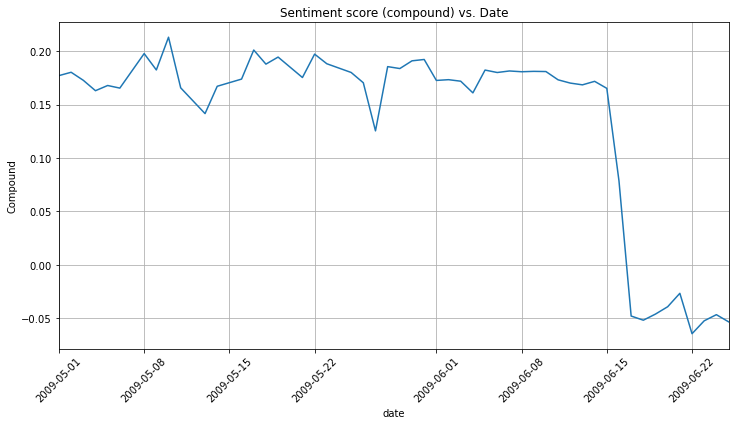

In [31]:
# Import library
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(12,6));
ax.plot(newdf_daily_merge.index.to_numpy(), newdf_daily_merge['sentiment_score'].to_numpy());
ax.set_xlabel('date');
ax.set_ylabel('Compound');
ax.grid(True);
ax.tick_params(axis='x',rotation=45);

ax.set_xlim(newdf_daily_merge.index.min(),newdf_daily_merge.index.max())
ax.set_title('Sentiment score (compound) vs. Date');

In [32]:
# Extract seasonality, trend and residual 
# Import library
from statsmodels.tsa.seasonal import seasonal_decompose

In [33]:
# Check data
newdf_daily_merge.head()

,sentiment_score
date,
2009-05-01,0.17718
2009-05-02,0.180311
2009-05-03,0.172791
2009-05-04,0.163054
2009-05-05,0.167923


In [34]:
# Define variables
result = seasonal_decompose(newdf_daily_merge['sentiment_score'], model= 'additive')

trend = result.trend
seasonal = result.seasonal
residual = result.resid

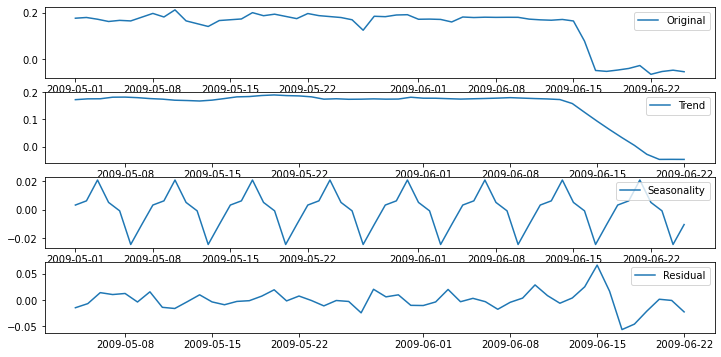

In [35]:
# Plot results

# Original data
plt.figure(figsize=(12,6))
plt.subplot(4,1,1)
plt.plot(newdf_daily_merge['sentiment_score'], label='Original')
plt.legend(loc='best')

# Trend
plt.subplot(4,1,2)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

# Seasonality
plt.subplot(4,1,3)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

# Residual
plt.subplot(4,1,4)
plt.plot(residual, label='Residual')
plt.legend(loc='best')


In [36]:
# Transform results to dataframe

data_original = newdf_daily_merge
df_original = pd.DataFrame(data_original)

seasonal_data = seasonal
df_seasonal = pd.DataFrame(seasonal_data)

trend_data = trend
df_trend = pd.DataFrame(trend_data)

residual_data = residual
df_residual = pd.DataFrame(residual_data)

df_result = pd.concat([df_original, df_seasonal, df_trend, df_residual], axis=1)
df_result.head()

,sentiment_score,seasonal,trend,resid
date,,,,
2009-05-01,0.17718,0.003311,NaN,NaN
2009-05-02,0.180311,0.006263,NaN,NaN
2009-05-03,0.172791,0.020927,NaN,NaN
2009-05-04,0.163054,0.005159,0.172628,-0.014732
2009-05-05,0.167923,-0.000768,0.175575,-0.006885


In [42]:
import panel as pn
import param
import hvplot.pandas

In [43]:
# Panel app - Create Interactive Dashboard for results vis
pn.extension()

class SentimentDashboard(param.Parameterized):
    result_selector = param.Selector(objects=['Original', 'Seasonality', 'Trend', 'Residual'], default='Original')

    @param.depends('result_selector')
    def plot(self):
        if self.result_selector == 'Original':
            columns_to_plot = ['sentiment_score']
            
        elif self.result_selector == 'Seasonality':
            columns_to_plot = ['seasonal']
            
        elif self.result_selector == 'Trend':
            columns_to_plot = ['trend']
        
        elif self.result_selector == 'Residual':
            columns_to_plot = ['resid']

        return df_result[columns_to_plot].hvplot.line().opts(height=400, title=f'Sentiment Score Comparison - {self.result_selector}')

    def panel(self):
        return pn.Row(
            pn.Param(self, width=300),
            self.plot
        )

sentiment_dashboard = SentimentDashboard(name='Sentiment_Dashboard')
component = sentiment_dashboard.panel()
component.servable()

Row
    [0] Param(SentimentDashboard, name='Sentiment_Dashboard', width=300)
    [1] ParamMethod(method, _pane=HoloViews, defer_load=False)

# 4. Modeling Phase

In this phase, 3 models were trained:

- Model A: ForecasterAutoreg using all cleaned data (date range: 01-05 to 25-06)
- Model B: ForecasterAutoreg using cleaned data without noise (date range: 01-05 to 15-06)
- Model C: SARIMAX using all cleaned data (date range: 01-05 to 25-06)

### Model A 

In [305]:
# Check for missing values
print(f' Rows with missing values: {newdf_daily_merge.isnull().any(axis=1).mean()}')

 Rows with missing values: 0.0


In [306]:
newdf_daily_merge.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56 entries, 2009-05-01 to 2009-06-25
Freq: D
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sentiment_score  56 non-null     object
dtypes: object(1)
memory usage: 2.9+ KB


In [307]:
# Import library
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [308]:
newdf_daily_merge = newdf_daily_merge.asfreq('D')

Train dates: 2009-05-01 00:00:00 --- 2009-06-18 00:00:00 (n=49) 
Test dates: 2009-06-19 00:00:00 --- 2009-06-25 00:00:00 (n=7) 


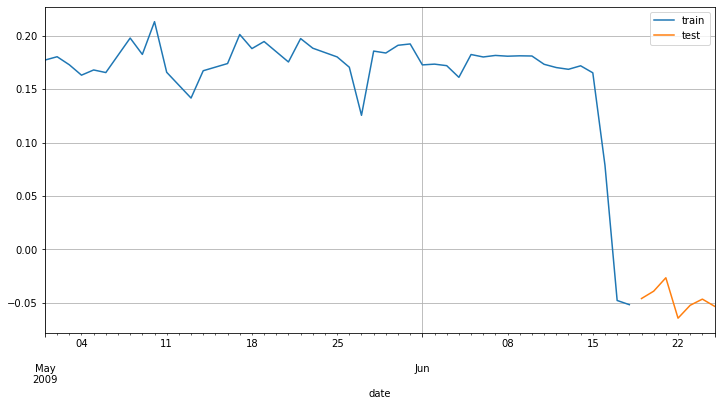

In [309]:
# Split data
steps = 7 #the last 7 days are used as the test set to evaluate the predictive capacity of the model
data_train = newdf_daily_merge[:-steps]
data_test = newdf_daily_merge[-steps:]

print(f'Train dates: {data_train.index.min()} --- {data_train.index.max()} (n={len(data_train)}) ')
print(f'Test dates: {data_test.index.min()} --- {data_test.index.max()} (n={len(data_test)}) ')

fig, ax = plt.subplots(figsize=(12,6))
data_train['sentiment_score'].plot(ax=ax, label='train')
data_test['sentiment_score'].plot(ax=ax, label='test')
ax.grid()
ax.legend();

In [310]:
# Forecaster autoreg

from sklearn.ensemble import RandomForestRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.metrics import mean_squared_error

forecaster = ForecasterAutoreg(regressor = RandomForestRegressor(random_state=42),lags=7)
forecaster.fit(y=data_train['sentiment_score'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=42) 
Lags: [1 2 3 4 5 6 7] 
Transformer for y: None 
Transformer for exog: None 
Window size: 7 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2009-05-01 00:00:00'), Timestamp('2009-06-18 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2023-11-14 13:18:31 
Last fit date: 2023-11-14 13:18:31 
Skforecast version: 0.10.1 
Python version: 3

In [311]:
# Predicting 7 days Model A
steps = 7
predictions7a = forecaster.predict(steps=steps)
predictions7a

2009-06-19   -0.030368
2009-06-20   -0.030486
2009-06-21   -0.030564
2009-06-22   -0.030564
2009-06-23   -0.030564
2009-06-24   -0.030564
2009-06-25   -0.030564
Freq: D, Name: pred, dtype: float64

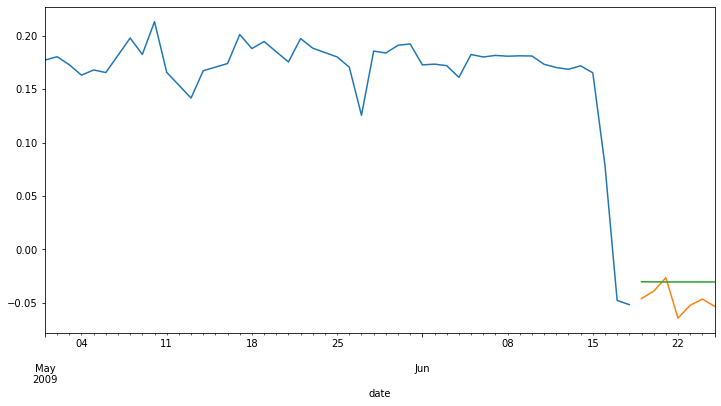

In [312]:
# Plot Model A 7 days prediction

fig.ax = plt.subplots(figsize=(12,6))
data_train['sentiment_score'].plot( label='train')
data_test['sentiment_score'].plot( label='test')
predictions7a.plot(label='predictions')
ax.legend();

In [313]:
# Predicting 30 days Model A
steps = 30
predictions30a = forecaster.predict(steps=steps)
predictions30a.head()

2009-06-19   -0.030368
2009-06-20   -0.030486
2009-06-21   -0.030564
2009-06-22   -0.030564
2009-06-23   -0.030564
Freq: D, Name: pred, dtype: float64

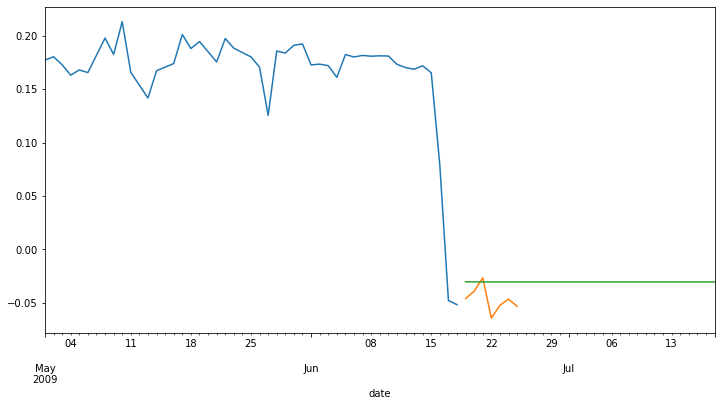

In [314]:
# Plot Model A 30 days prediction

fig.ax = plt.subplots(figsize=(12,6))
data_train['sentiment_score'].plot( label='train')
data_test['sentiment_score'].plot( label='test')
predictions30a.plot(label='predictions')
ax.legend();

In [315]:
# Predicting 90 days Model A
steps = 90
predictions90a = forecaster.predict(steps=steps)
predictions90a.head()

2009-06-19   -0.030368
2009-06-20   -0.030486
2009-06-21   -0.030564
2009-06-22   -0.030564
2009-06-23   -0.030564
Freq: D, Name: pred, dtype: float64

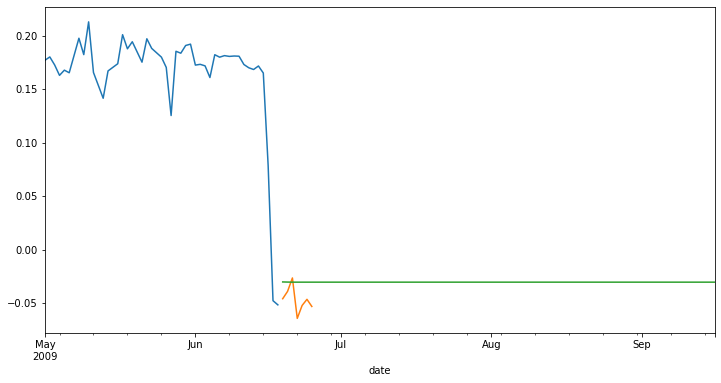

In [316]:
# Plot Model A 90 days prediction

fig.ax = plt.subplots(figsize=(12,6))
data_train['sentiment_score'].plot( label='train')
data_test['sentiment_score'].plot( label='test')
predictions90a.plot(label='predictions')
ax.legend();

### Model B 

In [317]:
# Remove data from date 16/06
newdf_daily_merge_test = newdf_daily_merge[:-10]
newdf_daily_merge_test

,sentiment_score
date,
2009-05-01,0.17718
2009-05-02,0.180311
2009-05-03,0.172791
2009-05-04,0.163054
2009-05-05,0.167923
2009-05-06,0.165489
2009-05-07,0.181648
2009-05-08,0.197808
2009-05-09,0.182475


Train dates: 2009-05-01 00:00:00 --- 2009-06-08 00:00:00 (n=39) 
Test dates: 2009-06-09 00:00:00 --- 2009-06-15 00:00:00 (n=7) 


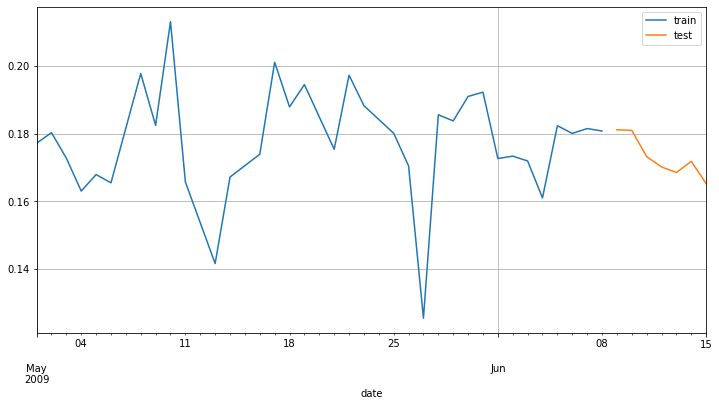

In [318]:
# Split data
steps = 7 #the last 7 days are used as the test set to evaluate the predictive capacity of the model
data_train2 = newdf_daily_merge_test[:-steps]
data_test2 = newdf_daily_merge_test[-steps:]

print(f'Train dates: {data_train2.index.min()} --- {data_train2.index.max()} (n={len(data_train2)}) ')
print(f'Test dates: {data_test2.index.min()} --- {data_test2.index.max()} (n={len(data_test2)}) ')

fig, ax = plt.subplots(figsize=(12,6))
data_train2['sentiment_score'].plot(ax=ax, label='train')
data_test2['sentiment_score'].plot(ax=ax, label='test')
ax.grid()
ax.legend();

In [319]:
# Fit Model B
forecaster = ForecasterAutoreg(regressor = RandomForestRegressor(random_state=42),lags=10)
forecaster.fit(y=data_train2['sentiment_score'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=42) 
Lags: [ 1  2  3  4  5  6  7  8  9 10] 
Transformer for y: None 
Transformer for exog: None 
Window size: 10 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2009-05-01 00:00:00'), Timestamp('2009-06-08 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: D 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2023-11-14 13:18:38 
Last fit date: 2023-11-14 13:18:38 
Skforecast version: 0.10.1 


In [320]:
# Predicting 7 days Model B
steps = 7
predictions7b = forecaster.predict(steps=steps)
predictions7b.head()

2009-06-09    0.178587
2009-06-10    0.181026
2009-06-11    0.177922
2009-06-12    0.180703
2009-06-13    0.180948
Freq: D, Name: pred, dtype: float64

In [321]:
data_test2['sentiment_score']

date
2009-06-09    0.181166
2009-06-10    0.180986
2009-06-11    0.173234
2009-06-12     0.17018
2009-06-13    0.168537
2009-06-14    0.171822
2009-06-15    0.165252
Freq: D, Name: sentiment_score, dtype: object

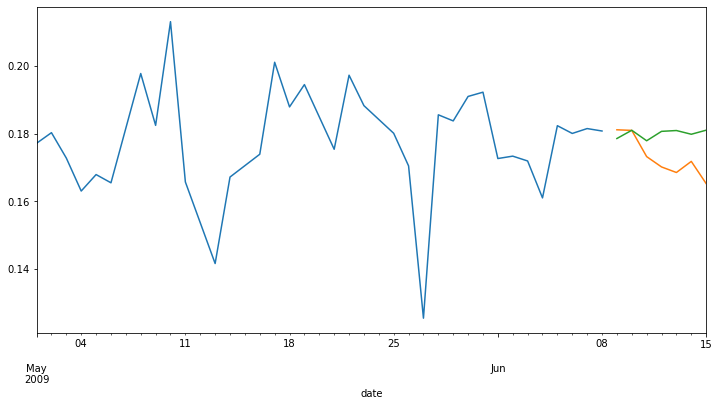

In [322]:
# Plot Model B 7 days prediction

fig.ax = plt.subplots(figsize=(12,6))
data_train2['sentiment_score'].plot( label='train')
data_test2['sentiment_score'].plot( label='test')
predictions7b.plot(label='predictions')
ax.legend();

In [323]:
# Predicting 30 days Model B
steps = 30
predictions30b = forecaster.predict(steps=steps)
predictions30b.head()

2009-06-09    0.178587
2009-06-10    0.181026
2009-06-11    0.177922
2009-06-12    0.180703
2009-06-13    0.180948
Freq: D, Name: pred, dtype: float64

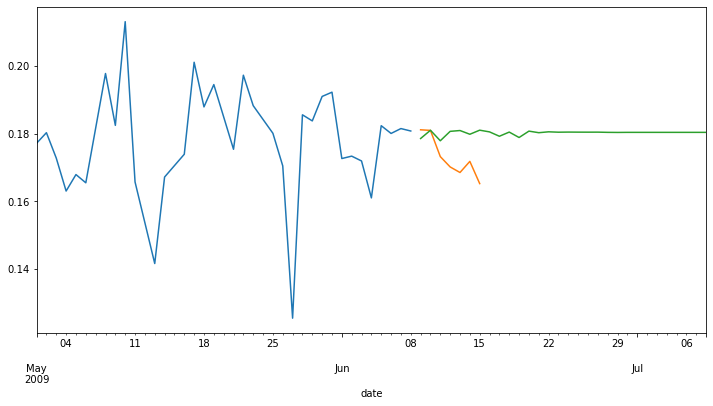

In [324]:
# Plot Model B 30 days prediction

fig.ax = plt.subplots(figsize=(12,6))
data_train2['sentiment_score'].plot( label='train')
data_test2['sentiment_score'].plot( label='test')
predictions30b.plot(label='predictions')
ax.legend();

In [325]:
# Predicting 90 days Model B
steps = 90
predictions90b = forecaster.predict(steps=steps)
predictions90b.head()

2009-06-09    0.178587
2009-06-10    0.181026
2009-06-11    0.177922
2009-06-12    0.180703
2009-06-13    0.180948
Freq: D, Name: pred, dtype: float64

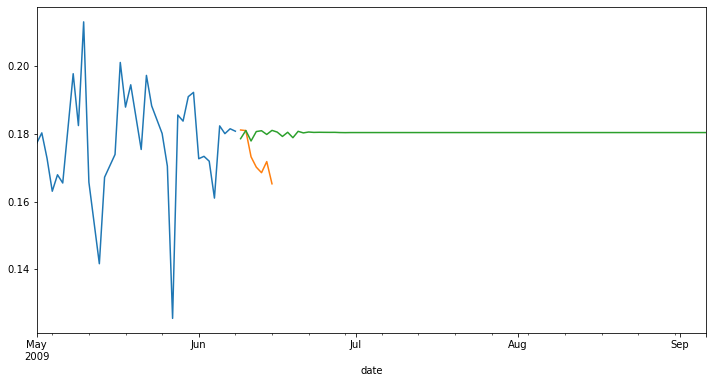

In [326]:
# Plot Model B 90 days prediction

fig.ax = plt.subplots(figsize=(12,6))
data_train2['sentiment_score'].plot( label='train')
data_test2['sentiment_score'].plot( label='test')
predictions90b.plot(label='predictions')
ax.legend();

### Model C 

In [292]:
# Import Library 
#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [267]:
# Make dataframe copy
newdf_daily_merge_copy = newdf_daily_merge
newdf_daily_merge_copy

,sentiment_score
date,
2009-05-01,0.17718
2009-05-02,0.180311
2009-05-03,0.172791
2009-05-04,0.163054
2009-05-05,0.167923
2009-05-06,0.165489
2009-05-07,0.181648
2009-05-08,0.197808
2009-05-09,0.182475


In [268]:
# Check unit
newdf_daily_merge_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56 entries, 2009-05-01 to 2009-06-25
Freq: D
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sentiment_score  56 non-null     object
dtypes: object(1)
memory usage: 896.0+ bytes


In [269]:
# Convert object to number
newdf_daily_merge_copy = pd.to_numeric(newdf_daily_merge_copy['sentiment_score'])

In [270]:
# Check changes
newdf_daily_merge_copy.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 56 entries, 2009-05-01 to 2009-06-25
Freq: D
Series name: sentiment_score
Non-Null Count  Dtype  
--------------  -----  
56 non-null     float64
dtypes: float64(1)
memory usage: 896.0 bytes


In [271]:
# SARIMAX parameters demonstration
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [272]:
y = newdf_daily_merge_copy

In [273]:
newdf_daily_merge_copy

date
2009-05-01    0.177180
2009-05-02    0.180311
2009-05-03    0.172791
2009-05-04    0.163054
2009-05-05    0.167923
2009-05-06    0.165489
2009-05-07    0.181648
2009-05-08    0.197808
2009-05-09    0.182475
2009-05-10    0.213141
2009-05-11    0.165733
2009-05-12    0.153675
2009-05-13    0.141616
2009-05-14    0.167195
2009-05-15    0.170564
2009-05-16    0.173934
2009-05-17    0.201135
2009-05-18    0.187934
2009-05-19    0.194535
2009-05-20    0.184969
2009-05-21    0.175404
2009-05-22    0.197309
2009-05-23    0.188302
2009-05-24    0.184215
2009-05-25    0.180129
2009-05-26    0.170487
2009-05-27    0.125456
2009-05-28    0.185597
2009-05-29    0.183794
2009-05-30    0.191028
2009-05-31    0.192285
2009-06-01    0.172664
2009-06-02    0.173374
2009-06-03    0.171944
2009-06-04    0.161025
2009-06-05    0.182378
2009-06-06    0.180086
2009-06-07    0.181526
2009-06-08    0.180806
2009-06-09    0.181166
2009-06-10    0.180986
2009-06-11    0.173234
2009-06-12    0.170180
2009-0

In [274]:
y.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 56 entries, 2009-05-01 to 2009-06-25
Freq: D
Series name: sentiment_score
Non-Null Count  Dtype  
--------------  -----  
56 non-null     float64
dtypes: float64(1)
memory usage: 896.0 bytes


In [275]:
# Import library
import statsmodels.api as sm

In [276]:
# Search for the best parameters 
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.93982D-01    |proj g|=  2.14794D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      6      1     0     0   4.078D-04  -3.940D-01
  F = -0.39398503081425901     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:-42.12632345119701
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =      


At iterate    5    f= -1.03400D+00    |proj g|=  7.63249D-01

At iterate   10    f= -1.08201D+00    |proj g|=  5.17558D-01

At iterate   15    f= -1.15036D+00    |proj g|=  1.72420D+00

At iterate   20    f= -1.17726D+00    |proj g|=  2.14202D-01

At iterate   25    f= -1.17729D+00    |proj g|=  9.01753D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     40      1     0     0   9.018D-04  -1.177D+00
  F =  -1.1772925781783570     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-123.85676875597599
RUNNING THE L-BFGS-B CODE

           * * *

Machine pre


At iterate    5    f= -1.57612D+00    |proj g|=  1.65162D+00

At iterate   10    f= -1.58178D+00    |proj g|=  1.72929D-02

At iterate   15    f= -1.58182D+00    |proj g|=  2.50648D-01

At iterate   20    f= -1.58194D+00    |proj g|=  7.50344D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     27      1     0     0   1.369D-04  -1.582D+00
  F =  -1.5819393181817141     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:-171.17720363635198
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10
 Thi


At iterate   10    f= -1.50886D+00    |proj g|=  5.99816D-03

At iterate   15    f= -1.50888D+00    |proj g|=  9.61252D-02

At iterate   20    f= -1.51116D+00    |proj g|=  3.35542D+00

At iterate   25    f= -1.61326D+00    |proj g|=  5.04858D+00

At iterate   30    f= -1.63183D+00    |proj g|=  8.11213D+00

At iterate   35    f= -1.64106D+00    |proj g|=  5.87920D+00

At iterate   40    f= -1.64548D+00    |proj g|=  2.82973D+00

At iterate   45    f= -1.64739D+00    |proj g|=  5.06600D+00

At iterate   50    f= -1.64848D+00    |proj g|=  6.71732D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     50     73   


At iterate   20    f= -1.48096D+00    |proj g|=  4.07142D+00

At iterate   25    f= -1.53919D+00    |proj g|=  9.65988D-01

At iterate   30    f= -1.58058D+00    |proj g|=  9.36943D+00

At iterate   35    f= -1.60900D+00    |proj g|=  7.22635D+00

At iterate   40    f= -1.62271D+00    |proj g|=  1.10479D+01

At iterate   45    f= -1.62698D+00    |proj g|=  1.19600D+01

At iterate   50    f= -1.62963D+00    |proj g|=  1.49946D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     68      1     0     0   1.499D+01  -1.630D+00
  F =  -1.6296279100686593     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       


At iterate    5    f= -1.03459D+00    |proj g|=  7.64602D-01

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

At iterate   10    f= -1.03691D+00    |proj g|=  7.21047D-03
  ys=-3.254E-09  -gs= 1.136E-08 BFGS update SKIPPED

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     88      3     1     0   4.286D-03  -1.037D+00
  F =  -1.0369092371156101     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

   evaluations in the last line search.  Termination
   may poss


At iterate   25    f= -1.58104D+00    |proj g|=  9.19320D-02

At iterate   30    f= -1.58244D+00    |proj g|=  2.08572D-01

At iterate   35    f= -1.58312D+00    |proj g|=  2.40380D-02

At iterate   40    f= -1.58697D+00    |proj g|=  3.77967D-02

At iterate   45    f= -1.58753D+00    |proj g|=  5.72767D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     47     61      1     0     0   1.088D-03  -1.588D+00
  F =  -1.5875342602790476     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:-167.80383715125333
RUNNING THE L-BFGS-B CODE

           * * *

Machine pre

In [277]:
# Based on AIC value where lower is better (-227.30), params 1,1,1 and 0,0,0,12 were perfomed in the model

mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.08281D+00    |proj g|=  1.22186D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3     21      1     0     0   7.094D-03  -2.083D+00
  F =  -2.0831072569946132     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
                 coef    std err          z      P>|z| 

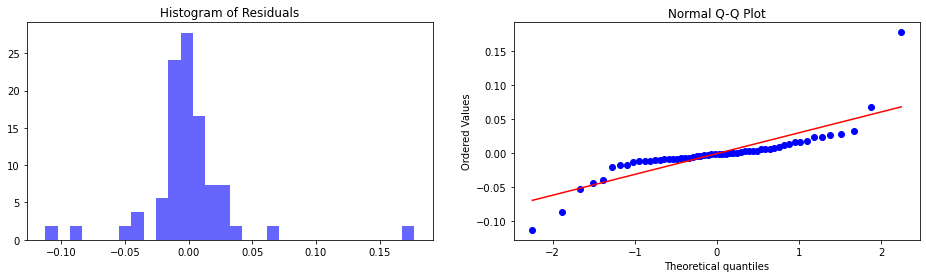

In [278]:
import matplotlib.pyplot as plt 
from scipy import stats 

# Get the residuals from SARIMAX results 
residuals = results.resid 

# Plot a histogram of the residuals 
plt.figure(figsize=(16, 4)) 
plt.subplot(1, 2, 1) 
plt.hist(residuals, bins=30, density=True, alpha=0.6, color='b') 
plt.title("Histogram of Residuals") 

# Plot a QQ plot of the residuals 
plt.subplot(1, 2, 2) 
stats.probplot(residuals, dist="norm", plot=plt) 
plt.title("Normal Q-Q Plot") 
plt.show()


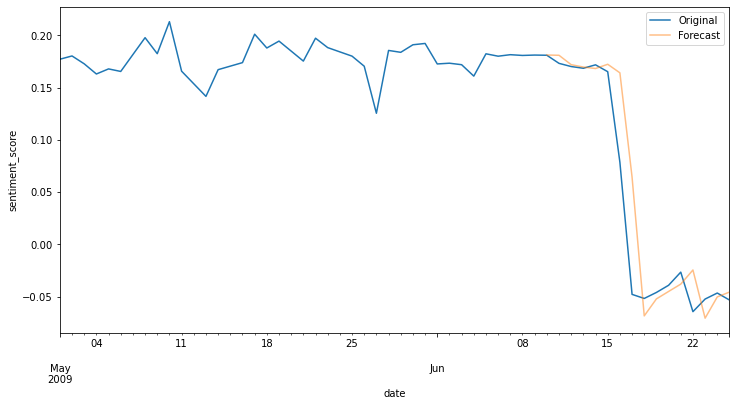

In [353]:
# Plot Model C 
pred = results.get_prediction(start = pd.to_datetime('2009-06-10'), dynamic=False)
pred_ci = pred.conf_int()
ax = y.plot(label='Original')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.5, figsize=(12, 6))
ax.set_xlabel('date')
ax.set_ylabel('sentiment_score')
plt.legend()
plt.show()

In [280]:
y_forecasted = pred.predicted_mean
y_truth = y['2009-06-01':]

In [281]:
y_truth

date
2009-06-01    0.172664
2009-06-02    0.173374
2009-06-03    0.171944
2009-06-04    0.161025
2009-06-05    0.182378
2009-06-06    0.180086
2009-06-07    0.181526
2009-06-08    0.180806
2009-06-09    0.181166
2009-06-10    0.180986
2009-06-11    0.173234
2009-06-12    0.170180
2009-06-13    0.168537
2009-06-14    0.171822
2009-06-15    0.165252
2009-06-16    0.078605
2009-06-17   -0.047918
2009-06-18   -0.051820
2009-06-19   -0.046075
2009-06-20   -0.039213
2009-06-21   -0.026631
2009-06-22   -0.064475
2009-06-23   -0.052387
2009-06-24   -0.046640
2009-06-25   -0.053316
Freq: D, Name: sentiment_score, dtype: float64

In [282]:
# Convert to dataframe
y_forecasted = pd.DataFrame(y_forecasted)
y_forecasted

,predicted_mean
date,
2009-06-01,0.192479
2009-06-02,0.169446
2009-06-03,0.173523
2009-06-04,0.171708
2009-06-05,0.159237
2009-06-06,0.185897
2009-06-07,0.179674
2009-06-08,0.181766
2009-06-09,0.180686


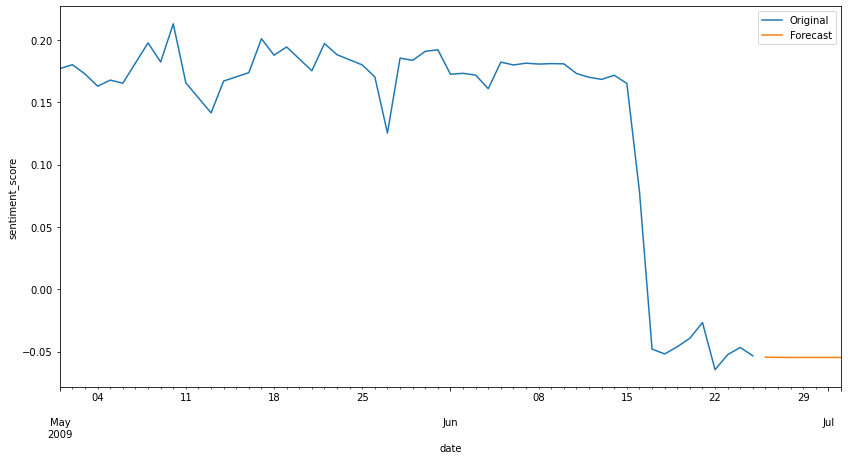

In [283]:
# Forecasting 7 days with Model C
pred_uc = results.get_forecast(steps=7)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='Original', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.set_xlabel('date')
ax.set_ylabel('sentiment_score')
plt.legend()
plt.show()

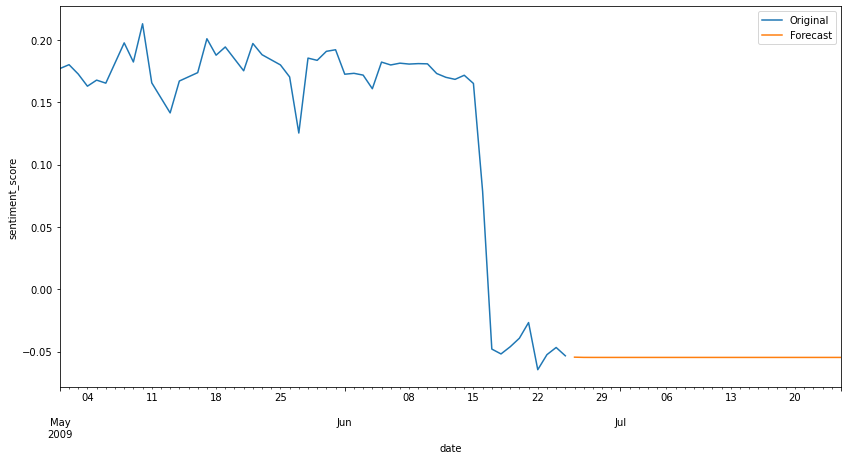

In [284]:
# Forecasting 30 days with Model C
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='Original', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.set_xlabel('date')
ax.set_ylabel('sentiment_score')
plt.legend()
plt.show()


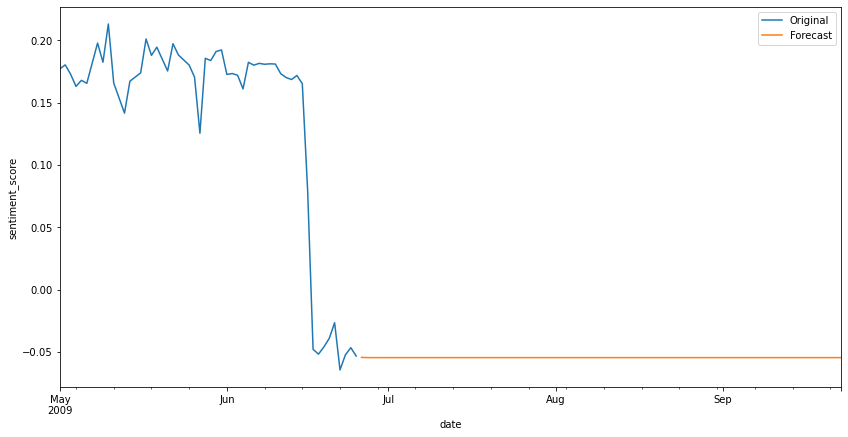

In [285]:
# Forecasting 90 days with Model C
pred_uc = results.get_forecast(steps=90)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='Original', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.set_xlabel('date')
ax.set_ylabel('sentiment_score')
plt.legend()
plt.show()


# 5. Elavuation Phase

Evaluating models A, B and C using Mean Squared Error (MSE)


In [327]:
# Test error Model A
# ==============================================================================
error_mse = mean_squared_error(y_true = data_test['sentiment_score'],y_pred = predictions)
print(f"Test error Model A (MSE): {error_mse}")

Test error Model A (MSE): 0.00039152394612050595


In [336]:
# Test error Model B
# ==============================================================================
error_mse2 = mean_squared_error(y_true = data_test2['sentiment_score'],y_pred = predictions)
print(f"Test error Model B (MSE): {error_mse2}")

Test error Model B (MSE): 0.041463350517435375


In [341]:
# Test error Model C
y_forecasted = pred.predicted_mean
y_truth = y['2009-06-20':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print(f"The Mean Squared Error of our forecasts is {mse}")

The Mean Squared Error of our forecasts is 0.0003607998808432366


# Databases Comparative Analysis

Evaluating performance testing the same queries on the same data between different databases: 
- Hive
- SQLite

According to SQLite's documentation: 
'SQLite is a C library that provides a lightweight disk-based database that doesn’t require a separate server process and allows accessing the database using a nonstandard variant of the SQL query language. Some applications can use SQLite for internal data storage. It’s also possible to prototype an application using SQLite and then port the code to a larger database such as PostgreSQL or Oracle.'

Moreover, SQLite is an embedded, file-based relational database management system (RDBMS) that can be used in Python applications without having to install any additional software.

Sources:
https://docs.python.org/3/library/sqlite3.html

https://towardsdatascience.com/yes-python-has-a-built-in-database-heres-how-to-use-it-b3c033f172d3

cProfile was used to perform comparative analysis between databases.

### SQLite database

In [1]:
# Import library
import sqlite3
import csv
import cProfile

In [2]:
# Create database SQLite
conn = sqlite3.connect('projectdb.db')

In [3]:
# Create cursos
c = conn.cursor()

In [4]:
# Create table
c.execute("""CREATE TABLE IF NOT EXISTS tweetsTable (id Int, number long, date String, query String, name String, body String)""")


In [5]:
# Read data from csv
with open('ProjectTweets.csv') as f:
    reader = csv.reader(f)
    data = list(reader)

In [6]:
# Insert data into the table
for row in data:
    c.execute("INSERT INTO tweetsTable (id, number, date, query, name, body) values (?, ?, ?, ?, ?, ?)", row)
    

In [7]:
# Commit changes
conn.commit()

In [4]:
# Selecting all column from tweetsTable
c.execute('''SELECT * FROM tweetsTable''').fetchall()

[(0,
  1467810369,
  'Mon Apr 06 22:19:45 PDT 2009',
  'NO_QUERY',
  '_TheSpecialOne_',
  "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"),
 (1,
  1467810672,
  'Mon Apr 06 22:19:49 PDT 2009',
  'NO_QUERY',
  'scotthamilton',
  "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!"),
 (2,
  1467810917,
  'Mon Apr 06 22:19:53 PDT 2009',
  'NO_QUERY',
  'mattycus',
  '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds'),
 (3,
  1467811184,
  'Mon Apr 06 22:19:57 PDT 2009',
  'NO_QUERY',
  'ElleCTF',
  'my whole body feels itchy and like its on fire '),
 (4,
  1467811193,
  'Mon Apr 06 22:19:57 PDT 2009',
  'NO_QUERY',
  'Karoli',
  "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. "),
 (5,
  1467811372,
  'Mon Apr 06 22:20:00 PDT 2009',
  'NO_QUERY',
  'joy_wolf

In [46]:
# Run query
cProfile.run("c.execute('''SELECT * FROM tweetsTable''').fetchall()")

         5 function calls in 1.576 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.118    0.118    1.576    1.576 <string>:1(<module>)
        1    0.000    0.000    1.576    1.576 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        1    0.001    0.001    0.001    0.001 {method 'execute' of 'sqlite3.Cursor' objects}
        1    1.457    1.457    1.457    1.457 {method 'fetchall' of 'sqlite3.Cursor' objects}




### Hive database

In [11]:
# Selecting all columns from tweetsTable
spark.sql("SELECT * FROM projectdb.tweetsTable").show()

+------+----------+--------------------+--------+---------------+--------------------+
|    id|    number|                date|   query|           name|                body|
+------+----------+--------------------+--------+---------------+--------------------+
|816210|1551363506|Sat Apr 18 08:51:...|NO_QUERY|  prosario_2000|@ctribe I hope yo...|
|816211|1551363569|Sat Apr 18 08:51:...|NO_QUERY|Chelsea_Volturi|@Boy_Kill_Boy Nop...|
|816212|1551363682|Sat Apr 18 08:51:...|NO_QUERY|askbillmitchell|@marty0518 Someti...|
|816213|1551363752|Sat Apr 18 08:51:...|NO_QUERY|       kendiixd|so i guesss im no...|
|816214|1551363844|Sat Apr 18 08:51:...|NO_QUERY|    ladycalypso|@DaiLS I do that,...|
|816215|1551363866|Sat Apr 18 08:51:...|NO_QUERY| FindingAnswers|trendy topic - Re...|
|816216|1551363911|Sat Apr 18 08:51:...|NO_QUERY|      HTwashere|@firsttiger Real ...|
|816217|1551363926|Sat Apr 18 08:51:...|NO_QUERY|     kelliekano|@Dragoncade I see...|
|816218|1551363992|Sat Apr 18 08:51:...|NO_

In [50]:
cProfile.run("spark.sql('SELECT * FROM projectdb.tweetsTable')")

         130 function calls in 0.034 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.034    0.034 <string>:1(<module>)
        2    0.000    0.000    0.000    0.000 __init__.py:1455(debug)
        2    0.000    0.000    0.000    0.000 __init__.py:1724(isEnabledFor)
        1    0.000    0.000    0.000    0.000 abc.py:117(__instancecheck__)
        1    0.000    0.000    0.000    0.000 clientserver.py:230(garbage_collect_object)
        1    0.000    0.000    0.000    0.000 clientserver.py:258(get_thread_connection)
        1    0.000    0.000    0.000    0.000 clientserver.py:271(_get_connection)
        1    0.000    0.000    0.034    0.034 clientserver.py:499(send_command)
        2    0.000    0.000    0.000    0.000 compat.py:113(hasattr2)
        2    0.000    0.000    0.000    0.000 compat.py:92(ispython3bytestr)
        2    0.000    0.000    0.000    0.000 compat.py:95(isbytearray)
 